# Trabajo Extra Capitulo 3

En este cuaderno voy a aplicar las técnicas que he aprendido en esta práctica con un par de imágenes:

In [1]:
import numpy as np
from scipy import signal
import cv2
import matplotlib.pyplot as plt
import matplotlib
from ipywidgets import interact, fixed, widgets
from mpl_toolkits.mplot3d import Axes3D

matplotlib.rcParams['figure.figsize'] = (15.0, 15.0)

images_path = './images/'

Text(0.5, 1.0, 'Extra 2')

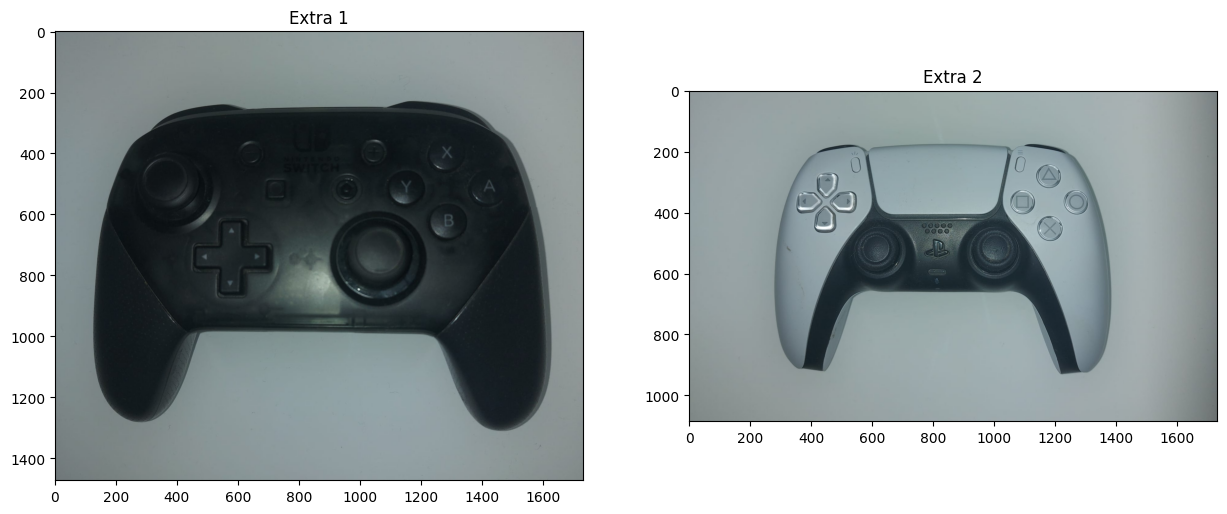

In [2]:
# Read the images
extra_1 = cv2.imread(images_path + 'extra_1.jpeg', -1)
extra_2 = cv2.imread(images_path + 'extra_2.jpeg', -1)

#Las imagenes de mi telefono estan en formato RGB, así que tengo que pasarlas a BGR
extra_1 = cv2.cvtColor(extra_1, cv2.COLOR_RGB2BGR)
extra_2 = cv2.cvtColor(extra_2, cv2.COLOR_RGB2BGR)

# And show them
plt.subplot(121)
plt.imshow(extra_1)
plt.title('Extra 1')

plt.subplot(122)
plt.imshow(extra_2)
plt.title('Extra 2')

Se tratan de los mandos de 2 consolas diferentes. Además uno es blanco y otro negro.
He decidido coger estas imágenes debido a la gran cantidad de detalles que tienen ambos, especialmente el de Nintendo Switch.

Me gustaría aplicar el Algoritmo de Canny en ambos para comprobar si es capaz de reconocer todos los detalles correctamente. Para ello, voy a reutilizar el código necesario de la práctica:

### **<span style="color:Blue"><b><i>Filtro Gaussiano</i></b></span>**

In [3]:
def gaussian_bell1D(x,sigma):

    base = 1/(sigma * np.sqrt(2 * np.pi))
    exp = np.exp(-(x*x) / (2*(sigma * sigma)))

    return base * exp

def gaussian_smoothing(image, sigma, w_kernel):
    
    # Define 1D kernel
    s=sigma
    w=w_kernel
    kernel_1D = np.array([gaussian_bell1D(z,s) for z in range(-w,w+1)])
    
    # Apply distributive property of convolution
    vertical_kernel = kernel_1D.reshape(2*w+1,1)
    horizontal_kernel = kernel_1D.reshape(1,2*w+1)   
    gaussian_kernel_2D = signal.convolve2d(vertical_kernel, horizontal_kernel)   
    
    # Blur image
    smoothed_img = cv2.filter2D(image,cv2.CV_8U,gaussian_kernel_2D)
    
    smoothed_norm = np.array(image.shape)
    smoothed_norm = cv2.normalize(smoothed_img, smoothed_norm, 0, 255, cv2.NORM_MINMAX) # Leave the second argument as None
    
    return smoothed_norm

### <font color="blue"><b><i>Algoritmo de Canny</i></b></font>

In [4]:
def canny_extra(image, lower_threshold, upper_threshold, sigma, w_gaussian):

    # Smooth image
    blurred_img = gaussian_smoothing(image,sigma,w_gaussian)
    
    # Apply Canny to blurred image
    canny_blurred = cv2.Canny(blurred_img,lower_threshold,upper_threshold)

    # Show initial image
    plt.subplot(121)
    plt.imshow(image, cmap='grey')
    plt.title('Imagen Original')
    
    # Show Canny with blurring
    plt.subplot(122)
    plt.imshow(canny_blurred, cmap='grey')
    plt.title('Imagen Resultante')
    

Una vez ya hemos definido los métodos que nos hacen falta, podemos proceder a comprobar su funcionamiento

In [5]:
# Convertimos las imagenes a escala de grises
extra_1 = cv2.cvtColor(extra_1,cv2.COLOR_BGR2GRAY)
extra_2 = cv2.cvtColor(extra_2,cv2.COLOR_BGR2GRAY)

# Interact with the parameters
interact(canny_extra, image=fixed(extra_1), lower_threshold=(0,260,20), upper_threshold=(0,260,20), sigma=(1,3,0.1), w_gaussian=(1,3,1));
interact(canny_extra, image=fixed(extra_2), lower_threshold=(0,260,20), upper_threshold=(0,260,20), sigma=(1,3,0.1), w_gaussian=(1,3,1));

interactive(children=(IntSlider(value=120, description='lower_threshold', max=260, step=20), IntSlider(value=1…

interactive(children=(IntSlider(value=120, description='lower_threshold', max=260, step=20), IntSlider(value=1…

NS : 20-40-1.60-2
PS5 : 40-80-1.70-2

Podemos ver que el resultado en la imagen del mando de la Nintendo Switch no es realmente satisfactorio. No he conseguido encontrar una combinación de parámetros que ofrezca un resultado capaz de detectar todos los bordes correctamente. Esto se debe a que, al ser todo de un color muy oscuro, existe muy poco contraste entre los detalles del mando.

En el caso del mando de Play Station, considero que el resultdo es realmente acertado. Sufre de los mismos problemas que el anterior en las zonas oscuras, especialmente con los joysticks, pues son varios los bordes en los que hay muy poco contraste.

Se puede ver que en los botones del mando hay varias capas de bordes. Esto se debe al efecto transparente que tiene el mando. Sin embargo, el resultado en estos es bastante bueno.

Aquí concluye mi trabajo extra de este capítulo. Me ha parecido muy interesante el algoritmo de Canny, ya que nos permite detectar los bordes con mucha precisión de una forma muy sencilla.